**Sarah Graber**<br>
sg3518<br>
Assignment 3<br>
Collaborators: Emily Zhang, Yasmeen Asali

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt
import fxns

%matplotlib inline

# plotting preset
plt.rc('figure', figsize=[10,6], facecolor='w')

## Problem 1

In [2]:
# read in data for Kepler Object of Interest 97
time, flux, flux_err = np.loadtxt('KOI97.01_1.out', unpack=True)

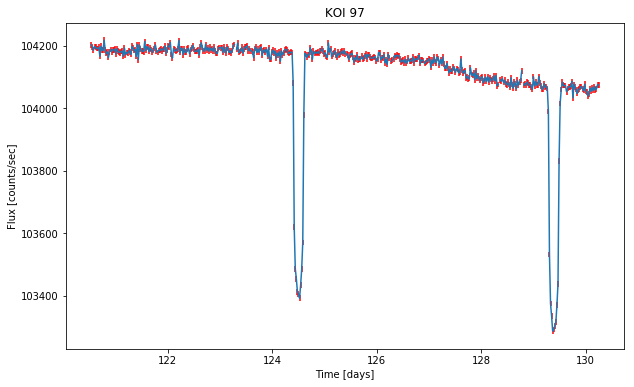

In [5]:
plt.errorbar(time,flux,yerr=flux_err, ecolor='r')
plt.title('KOI 97')
plt.ylabel('Flux [counts/sec]')
plt.xlabel('Time [days]')
plt.show()

## Problem 2

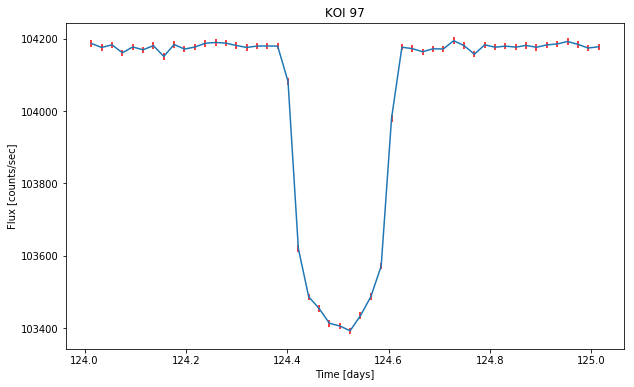

In [6]:
# slicing out a single transit
eclipseTime = time[170:220]
eclipseFlux = flux[170:220]
eclipseFlux_err = flux_err[170:220]

# defining our constants
t0 = eclipseTime[24]                     # from center of eclipse
tau = eclipseTime[26] - eclipseTime[21]  # loosely the width of eclipse, changed it a bit to better approximate the shape

plt.errorbar(eclipseTime,(eclipseFlux),yerr=eclipseFlux_err, ecolor='r')
plt.title('KOI 97')
plt.ylabel('Flux [counts/sec]')
plt.xlabel('Time [days]')
plt.show()

**part a):**

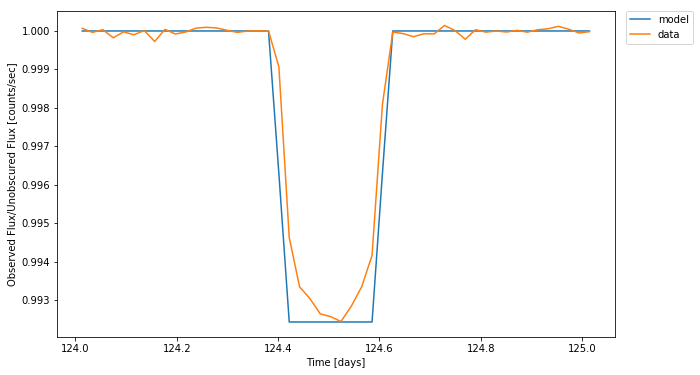

In [7]:
# constructing the model for the same points as the actual eclipse
testFlux = np.zeros(50)
for j in range(50):
    zz = (eclipseTime[j]-t0)/tau
    testFlux[j] = fxns.Flux(0.087,zz)
    
plt.plot(eclipseTime,testFlux, label='model')
plt.errorbar(eclipseTime,(eclipseFlux/eclipseFlux[16]), label='data')
plt.ylabel('Observed Flux/Unobscured Flux [counts/sec]')
plt.xlabel('Time [days]')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

**part b):**

In [8]:
# Flux ratio code from second pset, now includes realistic limb-darkening
def Flux2(p,z,N):
    '''gives the ratio of obscured to unobscured flux of a star during planetary transit w/ limb darkening'''
    
    def I(r):
        '''limb darkening parameter'''
        mu = math.sqrt((1-(r**2)))
        return 1 - (1-mu)**(3/2)
        #return 1
        
    # defining the denominator
    def dformula(r):
        '''function to multiply a variable by 2 * I'''
        return 2*r*I(r)
    
    # defining the numerator
    def nformula(r):
        '''function to multiply a variable by 2 * (1-delta) * I'''
        
        # delta partial function; different function for different values of z
        if r>=(z+p) or r<=(z-p):
            delta = 0
        elif (r+z)<=p:
            delta = 1.0
        else:
            delta = ((math.pi)**(-1))*math.acos((z**2 - p**2 + r**2)/(2*z*r))
            
        return (1-delta)*2*r*I(r)
    
    
    return fxns.integraltr(nformula, 0, 1, N) / fxns.integraltr(dformula, 0, 1, N)

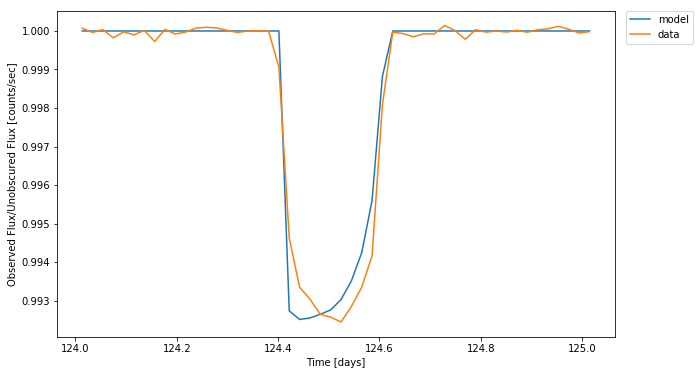

In [9]:
# constructing the model with limb-darkening, adjusting tau and t0
tau2 = eclipseTime[27] - eclipseTime[18]
testFlux2 = np.zeros(50)
for k in range(50):
    zzz = (eclipseTime[k]-eclipseTime[20])/tau2
    testFlux2[k] = Flux2(0.076,zzz,100)
    
plt.plot(eclipseTime,testFlux2, label='model')
plt.errorbar(eclipseTime,(eclipseFlux/eclipseFlux[16]), label='data')
plt.ylabel('Observed Flux/Unobscured Flux [counts/sec]')
plt.xlabel('Time [days]')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
plt.show()

## Problem 3

In [10]:
# creating our habitable zone function
def HabitableZone(Teff):
    L_term = (Teff / 5780)**4
    Tstar = Teff - 5780
    Seff = 1.014 + ((8.177*10**(-5)) * Tstar) + ((1.706*10**(-9)) * Tstar**2)
    return ((L_term / Seff)**(1/2)) -.5

def bisection(a,b):
    '''finds zeros of the habitable zone function using the bisection method'''
    
    if HabitableZone(a) * HabitableZone(b) >= 0:
        print("choose different a and b values")
        return
        
    while (b-a) >= 0.01:
        c = (a+b)/2
        if (HabitableZone(c) == 0):
            break
        elif HabitableZone(c) * HabitableZone(a) >= 0:
            a = c
        else:
            b = c
    return c

In [11]:
print("The value of Teff for d=0.5 AU =", bisection(3000,5000), "K")

The value of Teff for d=0.5 AU = 3947.0596313476562 K
